In [281]:
import numpy as np
import sys
import os
import IPython
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append('utils')

from plugin_feature_extractor import PluginFeatureExtractor
import numpy as np
from utility_functions import get_batches, get_stats, display_stats, plot_error, write_wavs
from tqdm import trange

algorithm_number = 18
# Works:  1-15
# Bleh:  16-19
# Works: 20-32
alg = (1.0 / 32.0) * float(algorithm_number - 1) + 0.001
a = 4

# overriden_parameters = [(0, 1.0), (1, 0.0), (2, 1.0), (3, 0.0), (a, alg)]

# other_params = [((i + 5), 0.5) for i in range(17)]

# operator_one = [((i + 23), 0.0) for i in range(22)]
# operator_two = [((i + 45), 0.0) for i in range(22)]
# operator_thr = [((i + 67), 0.0) for i in range(22)]
# operator_fou = [((i + 89), 0.0) for i in range(22)]
# operator_fiv = [((i + 111), 0.0) for i in range(22)]
# operator_six = [((i + 133), 0.0) for i in range(22)]

# #overriden_parameters.extend(operator_one)
# overriden_parameters.extend(operator_two)
# overriden_parameters.extend(operator_thr)
# overriden_parameters.extend(operator_fou)
# overriden_parameters.extend(operator_fiv)
# overriden_parameters.extend(operator_six)

# overriden_parameters.extend(other_params)
overriden_parameters = [(2, 1.0), (3, 0.0), (4, 1.0)]

extractor = PluginFeatureExtractor(midi_note=24, note_length_secs=0.4,
                                   desired_features=[i for i in range(8, 21)],
                                   overriden_parameters=overriden_parameters,
                                   render_length_secs=0.7,
                                   pickle_path="utils/normalisers",
                                   warning_mode="ignore", normalise_audio=False)
print np.array(extractor.overriden_parameters)
path = "/home/tollie/Development/vsts/synths/granulator/Builds/build-granulator-Desktop-Debug/build/debug/granulator.so"
extractor.load_plugin(path)

[[ 2.  1.]
 [ 3.  0.]
 [ 4.  1.]]
Successfully loaded plugin.


Length of tweakable params: 6


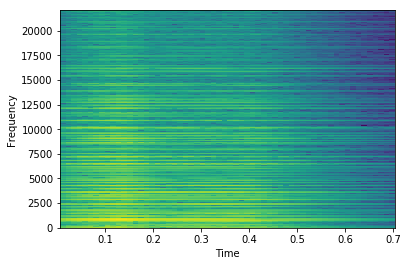

In [282]:
(features, parameters) = extractor.get_random_normalised_example()
patch = extractor.add_patch_indices(parameters)

extractor.set_patch(patch)
x = extractor.get_audio_frames()

print "Length of tweakable params: " + str(len(patch))

plt.specgram(x, NFFT=1024, Fs=44100, noverlap=512)

# Plot a spectrogram
plt.xlabel('Time')
plt.ylabel('Frequency')

In [283]:
IPython.display.Audio(x, rate=44100)

In [284]:
extractor.list_patch()

10
  0: Frequency        (0.140781536698)
  1: Rate             (0.284040600061)
  2: GrainLength      (1.0)
  3: PositionMod      (0.0)
  4: Overlaps         (1.0)
  5: Attack           (0.124711513519)
  6: Decay            (0.0430617593229)
  7: Sustain          (0.238435924053)
  8: Release          (0.0448454990983)
